# QG中期考核

## 相关设置

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

## 数据导入

In [2]:
Data = pd.read_csv('./data//train/train.csv')

In [3]:
Data

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,4379_115,Y,Y_4,121.0,115.0,offline,hard,4379.0,F,High School Diploma,2.0,NaN,5.0,N,4.0,1
49994,3809_58,U,U_1,NaN,58.0,offline,intermediate,3809.0,F,High School Diploma,3.0,30.0,2.0,N,3.0,1
49995,18109_42,T,T_2,117.0,42.0,online,easy,18109.0,F,High School Diploma,2.0,41.0,2.0,N,1.0,1
49996,6384_113,Y,Y_4,121.0,113.0,offline,intermediate,6384.0,M,Matriculation,3.0,NaN,2.0,N,5.0,1


## 数据预处理

### 缺失值处理

In [4]:
Data.isnull()

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
49994,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
49995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [5]:
Data.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

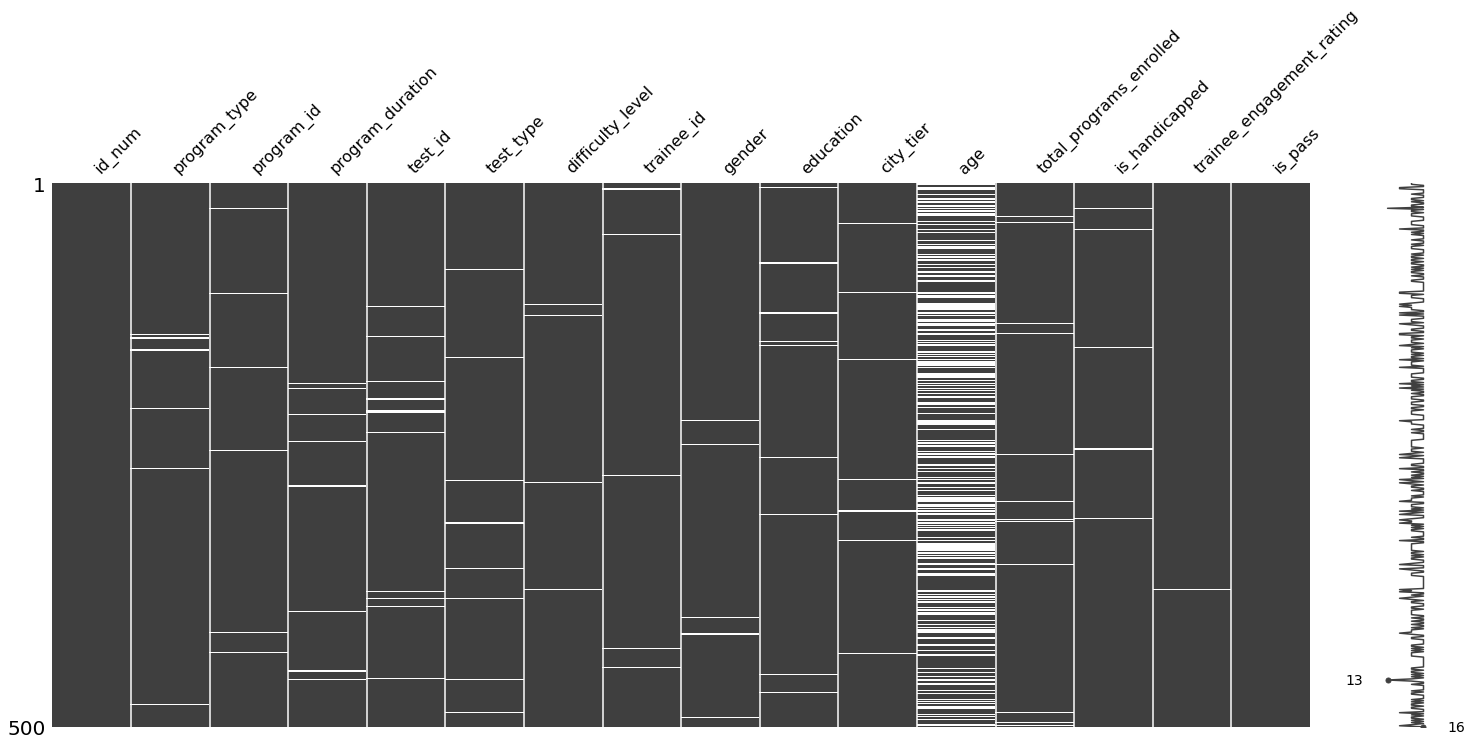

In [7]:
msno.matrix(Data.sample(500))#可视化缺失值

In [8]:
sexnull=Data[Data['age'].isnull()]

In [9]:
sexnull

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
10,9932_80,V,V_3,131.0,80.0,offline,easy,9932.0,F,High School Diploma,3.0,NaN,2.0,N,4.0,1
11,8543_31,T,T_3,134.0,31.0,online,easy,8543.0,F,High School Diploma,4.0,NaN,2.0,N,1.0,1
12,15848_149,Y,Y_1,136.0,149.0,offline,intermediate,15848.0,M,High School Diploma,1.0,NaN,4.0,N,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,20030_116,Y,Y_4,121.0,116.0,offline,hard,20030.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
49981,15274_183,Z,Z_1,136.0,183.0,online,easy,15274.0,F,Matriculation,2.0,NaN,1.0,N,2.0,1
49987,15829_64,U,U_1,134.0,64.0,online,easy,15829.0,M,High School Diploma,2.0,NaN,4.0,Y,4.0,1
49993,4379_115,Y,Y_4,121.0,115.0,offline,hard,4379.0,F,High School Diploma,2.0,NaN,5.0,N,4.0,1


In [10]:
sexnull.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,19123.000000,19093.000000,19099.000000,19108.000000,0.0,19112.000000,19092.000000,19379.000000
mean,128.066151,94.967108,9356.109168,2.271980,NaN,2.685956,2.435785,0.696218
std,6.988326,49.763575,5350.149671,1.019913,NaN,1.269773,1.309884,0.459902
min,117.000000,0.000000,5.000000,1.000000,NaN,1.000000,1.000000,0.000000
25%,121.000000,52.000000,4998.000000,1.000000,NaN,2.000000,1.000000,0.000000
50%,131.000000,97.000000,9080.000000,2.000000,NaN,2.000000,2.000000,1.000000
75%,135.000000,137.000000,13618.500000,3.000000,NaN,4.000000,4.000000,1.000000
max,136.000000,187.000000,20093.000000,4.000000,NaN,14.000000,5.000000,1.000000


In [11]:
Data.loc[(Data['difficulty_level']=='easy')&(Data['age'].notnull())]

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
20,10498_159,Y,Y_1,136.0,NaN,online,easy,10498.0,M,High School Diploma,3.0,27.0,2.0,N,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,6155_17,T,T_4,120.0,17.0,online,easy,6155.0,F,Matriculation,4.0,24.0,4.0,Y,1.0,1
49990,17107_180,Z,Z_1,136.0,180.0,offline,easy,17107.0,F,High School Diploma,2.0,45.0,1.0,N,2.0,1
49991,13936_61,U,U_1,134.0,61.0,online,easy,13936.0,M,Bachelors,4.0,26.0,3.0,N,1.0,0
49992,12375_173,Z,Z_2,120.0,173.0,online,easy,12375.0,F,Matriculation,4.0,26.0,1.0,N,1.0,1


In [12]:
Data.loc[(Data['difficulty_level']=='easy')&(Data['age'].notnull())].describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,16205.000000,16174.000000,16155.000000,16170.000000,16407.000000,16159.000000,16160.000000,16407.000000
mean,127.957606,96.416224,10250.584030,2.258380,36.791309,2.411473,2.297896,0.741939
std,6.884059,56.849150,5835.836228,1.004058,8.980261,1.249610,1.355995,0.437581
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,43.000000,5294.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,130.000000,87.000000,10262.000000,2.000000,41.000000,2.000000,2.000000,1.000000
75%,134.000000,155.000000,15153.000000,3.000000,45.000000,3.000000,3.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,59.000000,14.000000,5.000000,1.000000


In [13]:
Data['age'] = Data['age'].fillna(37)

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        49998 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

In [15]:
print(Data['difficulty_level'].unique())

['intermediate' 'easy' 'hard' 'vary hard' nan]


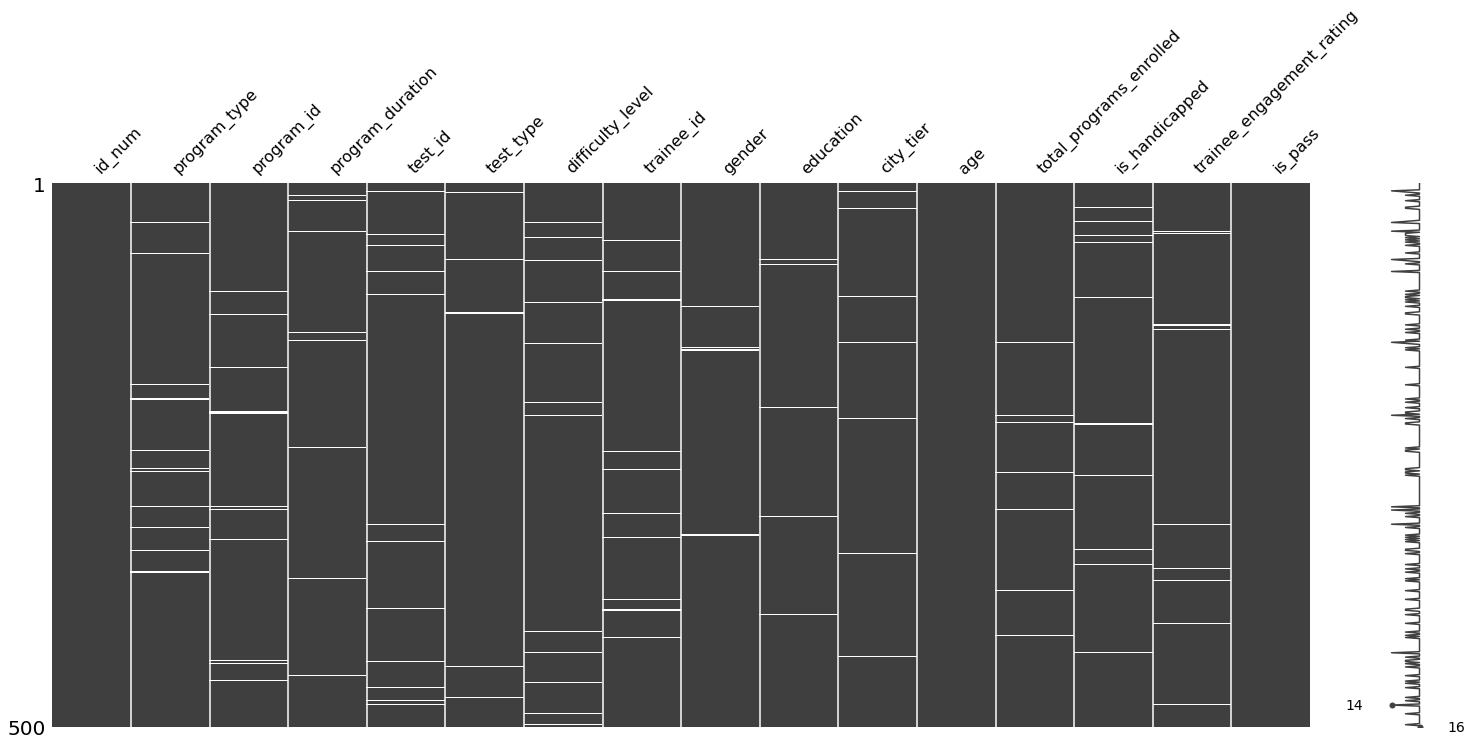

In [16]:
msno.matrix(Data.sample(500))#可视化缺失值

In [17]:
Data.difficulty_level.value_counts() 

easy            26952
intermediate    13996
hard             6974
vary hard        1373
Name: difficulty_level, dtype: int64

In [18]:
Data['difficulty_level'].fillna('easy')#easy出现最多，我们用easy填充nan

0        intermediate
1                easy
2                easy
3                easy
4        intermediate
             ...     
49993            hard
49994    intermediate
49995            easy
49996    intermediate
49997            hard
Name: difficulty_level, Length: 49998, dtype: object

In [19]:
import seaborn as sns

除了对特征权重选择外，我们也要分析特征相关性来筛选特征。相关性大的特征容易造成过拟合现象，因此需要进行剔除。最好的情况就是：所有特征相关性很低，各自的方差或者说信息量很高。

In [20]:
#target = Data['is_pass']

In [21]:
#features=['male','female','easy','intermediate','hard','very hard']

In [22]:
# 删除带NAN的数据行
Data=Data.dropna(axis=0,how='any')

In [43]:
Data["gender"] = pd.factorize(Data["gender"])[0].astype(np.uint16)
Data["program_id"] = pd.factorize(Data["program_id"])[0].astype(np.uint16)
Data["difficulty_level"] = pd.factorize(Data["difficulty_level"])[0].astype(np.uint16)
Data["education"] = pd.factorize(Data["education"])[0].astype(np.uint16)
Data["is_handicapped"] = pd.factorize(Data["is_handicapped"])[0].astype(np.uint16)
Data["program_type"] = pd.factorize(Data["program_type"])[0].astype(np.uint16)
Data["test_type"] = pd.factorize(Data["test_type"])[0].astype(np.uint16)

<ipython-input-43-bd72227ff870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["gender"] = pd.factorize(Data["gender"])[0].astype(np.uint16)
<ipython-input-43-bd72227ff870>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["program_id"] = pd.factorize(Data["program_id"])[0].astype(np.uint16)
<ipython-input-43-bd72227ff870>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [44]:
Data

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,0,0,136.0,150.0,0,0,9389.0,0,0,3.0,24.0,5.0,0,1.0,0
1,16523_44,1,1,131.0,44.0,0,1,16523.0,1,1,4.0,26.0,2.0,0,3.0,1
2,13987_178,2,2,120.0,178.0,1,1,13987.0,0,0,1.0,40.0,1.0,0,2.0,1
3,13158_32,1,3,117.0,32.0,0,1,13158.0,1,0,3.0,37.0,4.0,0,1.0,1
4,10591_84,3,4,131.0,84.0,0,0,10591.0,1,1,1.0,42.0,2.0,0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,13936_61,4,7,134.0,61.0,1,1,13936.0,0,2,4.0,26.0,3.0,0,1.0,0
49992,12375_173,2,2,120.0,173.0,1,1,12375.0,1,0,4.0,26.0,1.0,0,1.0,1
49993,4379_115,0,10,121.0,115.0,0,2,4379.0,1,1,2.0,37.0,5.0,0,4.0,1
49995,18109_42,1,3,117.0,42.0,1,1,18109.0,1,1,2.0,41.0,2.0,0,1.0,1


## 独热编码

In [45]:
#sex = pd.get_dummies(Data[["gender"]])

In [72]:
#program_id = pd.get_dummies(Data[["program_id"]])

In [75]:
 #difficulty_level= pd.get_dummies(Data[["difficulty_level"]])

In [76]:
#education= pd.get_dummies(Data[["education"]])

In [81]:
#is_handicapped= pd.get_dummies(Data[["is_handicapped"]])

In [98]:
#program_type=pd.get_dummies(Data[["program_type"]])

,program_type_S,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
49993,0,0,0,0,0,1,0
49994,0,0,1,0,0,0,0
49995,0,1,0,0,0,0,0
49996,0,0,0,0,0,1,0


### DataFrame拼接

In [99]:
#df_test=Data.copy()

In [102]:
#df_test['gender']=sex

In [104]:
#df_test['difficulty_level']= difficulty_level

In [107]:
# difficulty_level

,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
49993,0,1,0,0
49994,0,0,1,0
49995,1,0,0,0
49996,0,0,1,0


In [57]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41468 entries, 0 to 49996
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     41468 non-null  object 
 1   program_type               41468 non-null  uint16 
 2   program_id                 41468 non-null  uint16 
 3   program_duration           41468 non-null  float64
 4   test_id                    41468 non-null  float64
 5   test_type                  41468 non-null  uint16 
 6   difficulty_level           41468 non-null  uint16 
 7   trainee_id                 41468 non-null  float64
 8   gender                     41468 non-null  uint16 
 9   education                  41468 non-null  uint16 
 10  city_tier                  41468 non-null  float64
 11  age                        41468 non-null  float64
 12  total_programs_enrolled    41468 non-null  float64
 13  is_handicapped             41468 non-null  uin

## 对标签进行编码

In [141]:
#from sklearn.preprocessing import LabelEncoder

In [142]:
#difficulty_level= pd.get_dummies(Data[["difficulty_level"]])

## 线性回归预测

In [62]:
from sklearn.linear_model import LinearRegression # 导入线性回归的类，采用二分类进行分类预测
from sklearn.model_selection import KFold # K折交叉验证，取平均，调参

predictors = ['program_type','program_id','program_duration','difficulty_level','trainee_id','gender','education','city_tier','age','total_programs_enrolled','is_handicapped','trainee_engagement_rating','test_type']# 输入机器学习算法的特征

alg = LinearRegression() # 初始化线性回归类
kf = KFold(n_splits=3, random_state=1) # KFold类实例化
# kf.get_n_splits(titanic) # 交叉验证集的拆分迭代次数

predictions = []

# 有3次for循环，每次建立一个回归模型
for train, test in kf.split(Data):
    train_predictors = (Data[predictors].iloc[train,:]) # 取出训练数据
    train_target = Data["is_pass"].iloc[train] # 获取到数据集中交叉分类好的标签，即是否活了下来
    alg.fit(train_predictors, train_target) # 训练模型
    test_predictions = alg.predict(Data[predictors].iloc[test,:]) # 检验模型误差
    predictions.append(test_predictions)

D:\anacondaSetup\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [63]:
predictions = np.concatenate(predictions, axis=0) # 转换成数组，才能比较大小

In [64]:
# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

print("测试数据的总数量：", len(predictions))
print("正确的数量：", sum(predictions == Data["is_pass"]))
accuracy = sum(predictions == Data["is_pass"]) / len(predictions)
print("准确率为：", accuracy)

测试数据的总数量： 41468
正确的数量： 29212
准确率为： 0.7044468023536221


In [66]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state=1, solver='liblinear') # 初始化逻辑回归类

# 逻辑回归交叉验证
score = model_selection.cross_val_score(alg, Data[predictors], Data["is_pass"], cv=3)
print("准确率为：", score.mean())

准确率为： 0.7038921347837243


## 建立逻辑回归

In [46]:
target=Data['is_pass']
feature=['program_type','program_id','program_duration','difficulty_level','trainee_id','gender','education','city_tier','age','total_programs_enrolled','is_handicapped','trainee_engagement_rating','test_type']
features=Data[feature]

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()# 实例化一个LR模型
lr.fit(features,target)

D:\anacondaSetup\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
print(lr.coef_)
print(lr.intercept_)

[[-4.72362498e-02 -3.33229125e-04  2.08210134e-03 -8.43539877e-02
   5.34555302e-07  9.21353975e-03  1.57802787e-01 -1.47432416e-01
   1.08949902e-02 -1.22242439e-01 -3.21254479e-02  3.45670475e-01
   2.16578857e-01]]
[0.00108286]


## 模型预测

In [50]:
data_test=pd.read_csv('./data/test/test1.csv')

In [51]:
data_test["gender"] = pd.factorize(data_test["gender"])[0].astype(np.uint16)
data_test["program_id"] = pd.factorize(data_test["program_id"])[0].astype(np.uint16)
data_test["difficulty_level"] = pd.factorize(data_test["difficulty_level"])[0].astype(np.uint16)
data_test["education"] = pd.factorize(data_test["education"])[0].astype(np.uint16)
data_test["is_handicapped"] = pd.factorize(data_test["is_handicapped"])[0].astype(np.uint16)
data_test["program_type"] = pd.factorize(data_test["program_type"])[0].astype(np.uint16)
data_test["test_type"] = pd.factorize(data_test["test_type"])[0].astype(np.uint16)

In [55]:
data_test
# 删除带NAN的数据行
data_test=data_test.dropna(axis=0,how='any')

In [ ]:
from sklearn.linear_model import LinearRegression # 导入线性回归的类，采用二分类进行分类预测
from sklearn.model_selection import KFold # K折交叉验证，取平均，调参


alg = LinearRegression() # 初始化线性回归类
kf = KFold(n_splits=3, random_state=1) # KFold类实例化
# kf.get_n_splits(titanic) # 交叉验证集的拆分迭代次数

predictions = []

# 有3次for循环，每次建立一个回归模型
for train, test in kf.split(titanic):
    train_predictors = (Data[predictors].iloc[Data,:]) # 取出训练数据
    train_target = titanic["Survived"].iloc[train] # 获取到数据集中交叉分类好的标签，即是否活了下来
    alg.fit(train_predictors, train_target) # 训练模型
    test_predictions = alg.predict(titanic[predictors].iloc[test,:]) # 检验模型误差
    predictions.append(test_predictions)